In [3]:
import pandas as pd

In [4]:
data = pd.read_csv(r"C:\Users\mitta\OneDrive\Desktop\Stroke_Prediction\stroke_prediction_dataset.csv")
data.shape

(15000, 22)

In [5]:
data.head()

,Patient ID,Patient Name,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,...,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Symptoms,Diagnosis
0,18153,Mamooty Khurana,56,Male,0,1,Married,Self-employed,Rural,130.91,...,Social Drinker,Moderate,0,Yes,Vegan,3.48,140/108,"HDL: 68, LDL: 133","Difficulty Speaking, Headache",Stroke
1,62749,Kaira Subramaniam,80,Male,0,0,Single,Self-employed,Urban,183.73,...,Never,Low,0,No,Paleo,1.73,146/91,"HDL: 63, LDL: 70","Loss of Balance, Headache, Dizziness, Confusion",Stroke
2,32145,Dhanush Balan,26,Male,1,1,Married,Never Worked,Rural,189.00,...,Rarely,High,0,Yes,Paleo,7.31,154/97,"HDL: 59, LDL: 95","Seizures, Dizziness",Stroke
3,6154,Ivana Baral,73,Male,0,0,Married,Never Worked,Urban,185.29,...,Frequent Drinker,Moderate,0,No,Paleo,5.35,174/81,"HDL: 70, LDL: 137","Seizures, Blurred Vision, Severe Fatigue, Head...",No Stroke
4,48973,Darshit Jayaraman,51,Male,1,1,Divorced,Self-employed,Urban,177.34,...,Rarely,Low,0,Yes,Pescatarian,6.84,121/95,"HDL: 65, LDL: 68",Difficulty Speaking,Stroke


# Explore Data

In [6]:
data.dtypes

Patient ID                    int64
Patient Name                 object
Age                           int64
Gender                       object
Hypertension                  int64
Heart Disease                 int64
Marital Status               object
Work Type                    object
Residence Type               object
Average Glucose Level       float64
Body Mass Index (BMI)       float64
Smoking Status               object
Alcohol Intake               object
Physical Activity            object
Stroke History                int64
Family History of Stroke     object
Dietary Habits               object
Stress Levels               float64
Blood Pressure Levels        object
Cholesterol Levels           object
Symptoms                     object
Diagnosis                    object
dtype: object

In [7]:
data.describe()

,Patient ID,Age,Hypertension,Heart Disease,Average Glucose Level,Body Mass Index (BMI),Stroke History,Stress Levels
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,49715.802867,54.035667,0.249000,0.502933,129.445209,27.474302,0.500267,5.022694
std,29000.656642,21.063111,0.432448,0.500008,40.487792,7.230201,0.500017,2.873223
min,1.000000,18.000000,0.000000,0.000000,60.000000,15.010000,0.000000,0.000000
25%,24562.000000,36.000000,0.000000,0.000000,94.517500,21.160000,0.000000,2.540000
50%,49448.000000,54.000000,0.000000,1.000000,128.900000,27.420000,1.000000,5.050000
75%,75112.000000,72.000000,0.000000,1.000000,164.592500,33.720000,1.000000,7.520000
max,99975.000000,90.000000,1.000000,1.000000,200.000000,40.000000,1.000000,10.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient ID                15000 non-null  int64  
 1   Patient Name              15000 non-null  object 
 2   Age                       15000 non-null  int64  
 3   Gender                    15000 non-null  object 
 4   Hypertension              15000 non-null  int64  
 5   Heart Disease             15000 non-null  int64  
 6   Marital Status            15000 non-null  object 
 7   Work Type                 15000 non-null  object 
 8   Residence Type            15000 non-null  object 
 9   Average Glucose Level     15000 non-null  float64
 10  Body Mass Index (BMI)     15000 non-null  float64
 11  Smoking Status            15000 non-null  object 
 12  Alcohol Intake            15000 non-null  object 
 13  Physical Activity         15000 non-null  object 
 14  Stroke

# Handling Null Values

In [9]:
data.isnull().sum()

Patient ID                     0
Patient Name                   0
Age                            0
Gender                         0
Hypertension                   0
Heart Disease                  0
Marital Status                 0
Work Type                      0
Residence Type                 0
Average Glucose Level          0
Body Mass Index (BMI)          0
Smoking Status                 0
Alcohol Intake                 0
Physical Activity              0
Stroke History                 0
Family History of Stroke       0
Dietary Habits                 0
Stress Levels                  0
Blood Pressure Levels          0
Cholesterol Levels             0
Symptoms                    2500
Diagnosis                      0
dtype: int64

In [10]:
data.value_counts('Symptoms')

Symptoms
Difficulty Speaking                                                              268
Numbness                                                                         254
Headache                                                                         253
Blurred Vision                                                                   251
Seizures                                                                         249
                                                                                ... 
Dizziness, Seizures, Blurred Vision, Difficulty Speaking, Difficulty Speaking      1
Dizziness, Seizures, Blurred Vision, Confusion                                     1
Dizziness, Seizures, Blurred Vision, Blurred Vision                                1
Dizziness, Numbness, Weakness, Weakness, Blurred Vision                            1
Weakness, Weakness, Weakness, Seizures                                             1
Name: count, Length: 5786, dtype: int64

In [11]:
mode_symptoms = data['Symptoms'].mode()[0]
mode_symptoms

'Difficulty Speaking'

In [12]:
data.fillna(mode_symptoms, inplace=True)
data

,Patient ID,Patient Name,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,...,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Symptoms,Diagnosis
0,18153,Mamooty Khurana,56,Male,0,1,Married,Self-employed,Rural,130.91,...,Social Drinker,Moderate,0,Yes,Vegan,3.48,140/108,"HDL: 68, LDL: 133","Difficulty Speaking, Headache",Stroke
1,62749,Kaira Subramaniam,80,Male,0,0,Single,Self-employed,Urban,183.73,...,Never,Low,0,No,Paleo,1.73,146/91,"HDL: 63, LDL: 70","Loss of Balance, Headache, Dizziness, Confusion",Stroke
2,32145,Dhanush Balan,26,Male,1,1,Married,Never Worked,Rural,189.00,...,Rarely,High,0,Yes,Paleo,7.31,154/97,"HDL: 59, LDL: 95","Seizures, Dizziness",Stroke
3,6154,Ivana Baral,73,Male,0,0,Married,Never Worked,Urban,185.29,...,Frequent Drinker,Moderate,0,No,Paleo,5.35,174/81,"HDL: 70, LDL: 137","Seizures, Blurred Vision, Severe Fatigue, Head...",No Stroke
4,48973,Darshit Jayaraman,51,Male,1,1,Divorced,Self-employed,Urban,177.34,...,Rarely,Low,0,Yes,Pescatarian,6.84,121/95,"HDL: 65, LDL: 68",Difficulty Speaking,Stroke
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,13981,Keya Iyer,88,Female,1,1,Divorced,Self-employed,Urban,160.22,...,Social Drinker,High,0,No,Paleo,1.12,171/92,"HDL: 44, LDL: 153",Difficulty Speaking,No Stroke
14996,87707,Anahita Virk,47,Female,0,0,Married,Private,Urban,107.58,...,Never,Low,1,No,Gluten-Free,1.47,155/71,"HDL: 35, LDL: 183",Difficulty Speaking,No Stroke
14997,33174,Ivana Kaur,35,Male,0,0,Married,Government Job,Rural,134.90,...,Rarely,High,1,No,Paleo,0.51,121/110,"HDL: 57, LDL: 159","Difficulty Speaking, Severe Fatigue, Headache",Stroke
14998,22343,Anvi Mannan,73,Male,0,0,Single,Self-employed,Urban,169.42,...,Never,High,0,Yes,Paleo,1.53,157/74,"HDL: 79, LDL: 91","Severe Fatigue, Numbness, Confusion, Dizziness...",No Stroke


In [13]:
data.isnull().sum()

Patient ID                  0
Patient Name                0
Age                         0
Gender                      0
Hypertension                0
Heart Disease               0
Marital Status              0
Work Type                   0
Residence Type              0
Average Glucose Level       0
Body Mass Index (BMI)       0
Smoking Status              0
Alcohol Intake              0
Physical Activity           0
Stroke History              0
Family History of Stroke    0
Dietary Habits              0
Stress Levels               0
Blood Pressure Levels       0
Cholesterol Levels          0
Symptoms                    0
Diagnosis                   0
dtype: int64

# Removing unimportant attributes

In [14]:
data = data.drop(columns=['Patient ID', 'Patient Name'])
data.head()

,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,Body Mass Index (BMI),Smoking Status,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Symptoms,Diagnosis
0,56,Male,0,1,Married,Self-employed,Rural,130.91,22.37,Non-smoker,Social Drinker,Moderate,0,Yes,Vegan,3.48,140/108,"HDL: 68, LDL: 133","Difficulty Speaking, Headache",Stroke
1,80,Male,0,0,Single,Self-employed,Urban,183.73,32.57,Non-smoker,Never,Low,0,No,Paleo,1.73,146/91,"HDL: 63, LDL: 70","Loss of Balance, Headache, Dizziness, Confusion",Stroke
2,26,Male,1,1,Married,Never Worked,Rural,189.00,20.32,Formerly Smoked,Rarely,High,0,Yes,Paleo,7.31,154/97,"HDL: 59, LDL: 95","Seizures, Dizziness",Stroke
3,73,Male,0,0,Married,Never Worked,Urban,185.29,27.50,Non-smoker,Frequent Drinker,Moderate,0,No,Paleo,5.35,174/81,"HDL: 70, LDL: 137","Seizures, Blurred Vision, Severe Fatigue, Head...",No Stroke
4,51,Male,1,1,Divorced,Self-employed,Urban,177.34,29.06,Currently Smokes,Rarely,Low,0,Yes,Pescatarian,6.84,121/95,"HDL: 65, LDL: 68",Difficulty Speaking,Stroke


# Exploratory Data Analysis

In [15]:
numerical_col = data.select_dtypes(include=['int64','float64'])
numerical_col.columns

Index(['Age', 'Hypertension', 'Heart Disease', 'Average Glucose Level',
       'Body Mass Index (BMI)', 'Stroke History', 'Stress Levels'],
      dtype='object')

In [16]:
category_col = data.select_dtypes(include=['object'])
category_col.columns

Index(['Gender', 'Marital Status', 'Work Type', 'Residence Type',
       'Smoking Status', 'Alcohol Intake', 'Physical Activity',
       'Family History of Stroke', 'Dietary Habits', 'Blood Pressure Levels',
       'Cholesterol Levels', 'Symptoms', 'Diagnosis'],
      dtype='object')

In [17]:
data[['Systolic BP', 'Diastolic BP']] = data['Blood Pressure Levels'].str.split('/', expand = True)
pd.to_numeric(data['Systolic BP'])
pd.to_numeric(data['Diastolic BP'])

0        108
1         91
2         97
3         81
4         95
        ... 
14995     92
14996     71
14997    110
14998     74
14999     81
Name: Diastolic BP, Length: 15000, dtype: int64

In [18]:
data[['HDL','LDL']] = data['Cholesterol Levels'].str.extract(r'HDL: (\d+), LDL: (\d+)').astype(int)

In [19]:
data = data.drop(columns = ['Blood Pressure Levels','Cholesterol Levels'], axis=1)
data.head()

,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,Body Mass Index (BMI),Smoking Status,...,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Symptoms,Diagnosis,Systolic BP,Diastolic BP,HDL,LDL
0,56,Male,0,1,Married,Self-employed,Rural,130.91,22.37,Non-smoker,...,0,Yes,Vegan,3.48,"Difficulty Speaking, Headache",Stroke,140,108,68,133
1,80,Male,0,0,Single,Self-employed,Urban,183.73,32.57,Non-smoker,...,0,No,Paleo,1.73,"Loss of Balance, Headache, Dizziness, Confusion",Stroke,146,91,63,70
2,26,Male,1,1,Married,Never Worked,Rural,189.00,20.32,Formerly Smoked,...,0,Yes,Paleo,7.31,"Seizures, Dizziness",Stroke,154,97,59,95
3,73,Male,0,0,Married,Never Worked,Urban,185.29,27.50,Non-smoker,...,0,No,Paleo,5.35,"Seizures, Blurred Vision, Severe Fatigue, Head...",No Stroke,174,81,70,137
4,51,Male,1,1,Divorced,Self-employed,Urban,177.34,29.06,Currently Smokes,...,0,Yes,Pescatarian,6.84,Difficulty Speaking,Stroke,121,95,65,68


In [20]:
numerical_col = data.select_dtypes(include=['int64','float64'])
numerical_col.columns

Index(['Age', 'Hypertension', 'Heart Disease', 'Average Glucose Level',
       'Body Mass Index (BMI)', 'Stroke History', 'Stress Levels'],
      dtype='object')

In [21]:
category_col = data.select_dtypes(include=['object'])
category_col.columns

Index(['Gender', 'Marital Status', 'Work Type', 'Residence Type',
       'Smoking Status', 'Alcohol Intake', 'Physical Activity',
       'Family History of Stroke', 'Dietary Habits', 'Symptoms', 'Diagnosis',
       'Systolic BP', 'Diastolic BP'],
      dtype='object')

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization of Numerical Values

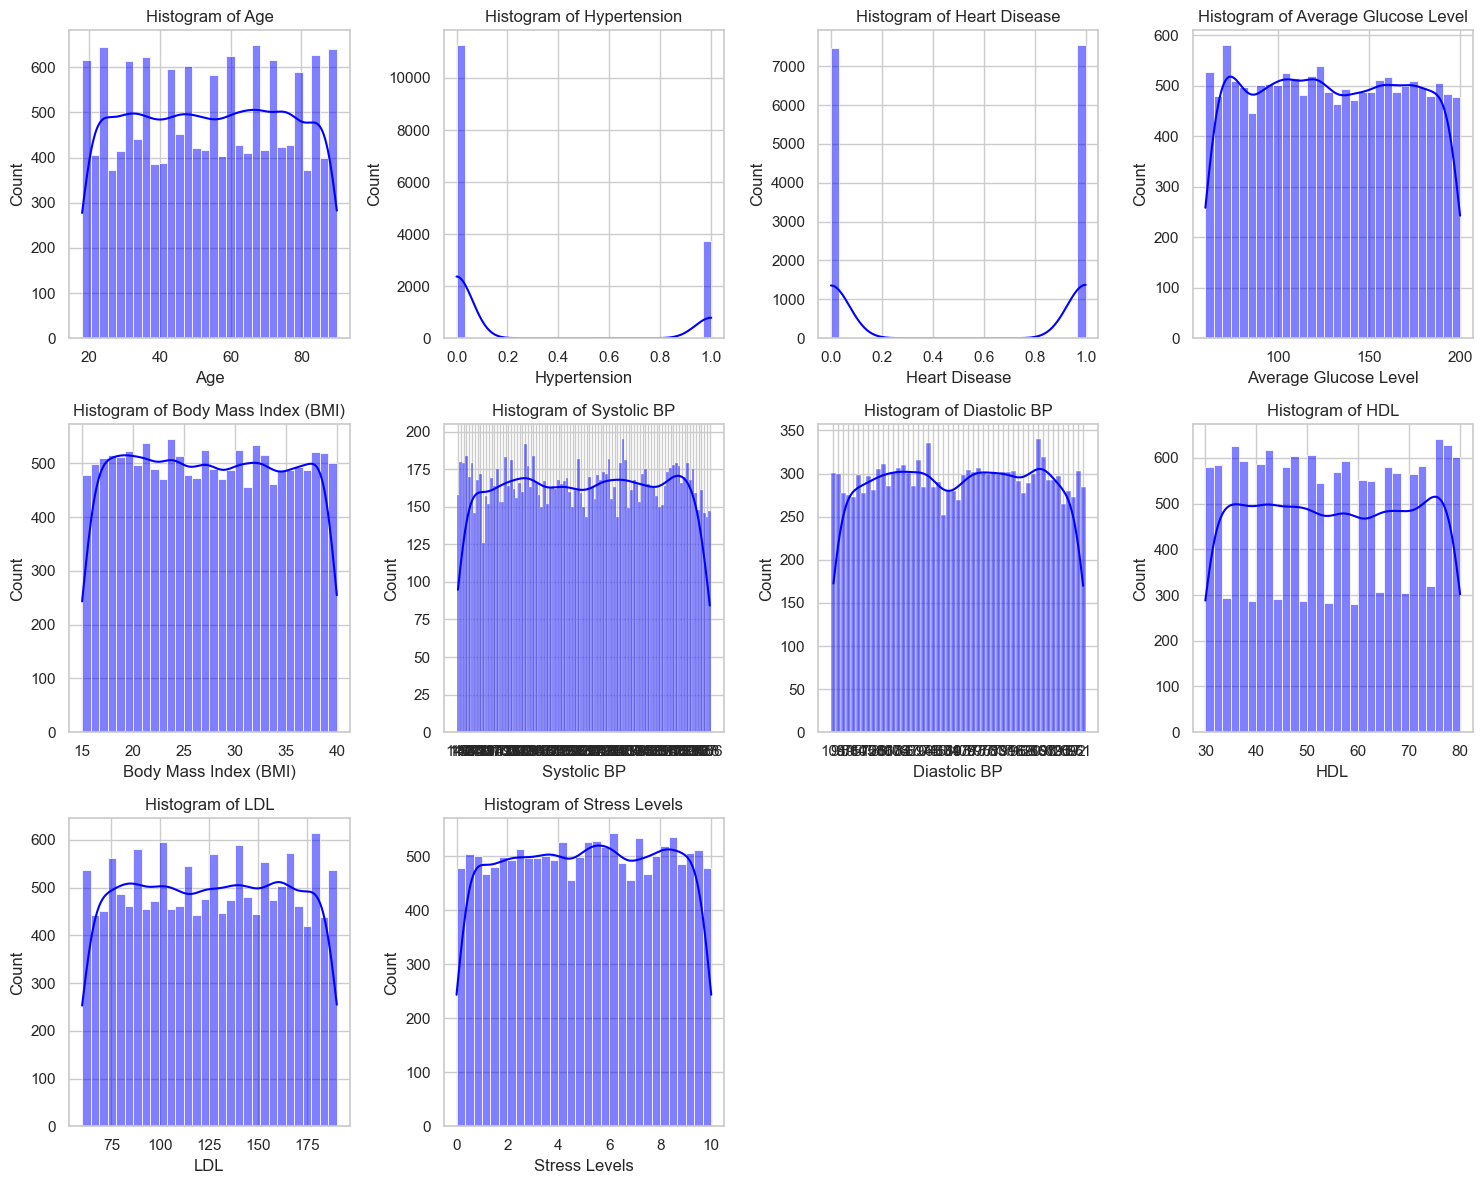

In [23]:
numerical_cols = ['Age', 'Hypertension', 'Heart Disease', 'Average Glucose Level',
       'Body Mass Index (BMI)','Systolic BP','Diastolic BP','HDL','LDL', 'Stress Levels']
sns.set(style="whitegrid")

plt.figure(figsize=(15,12))
for i, col in enumerate(numerical_cols,1):
    plt.subplot(3, 4, i)
    sns.histplot(data[col], color='blue', kde=True, bins=30)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()


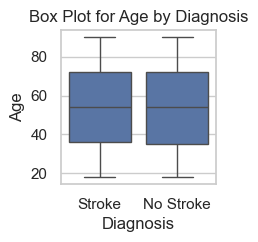

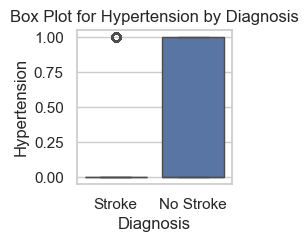

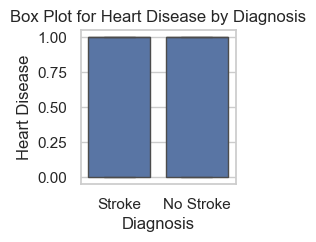

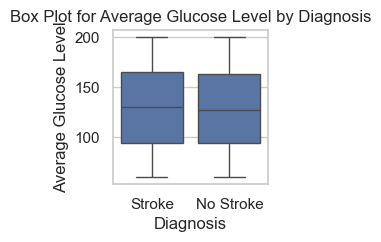

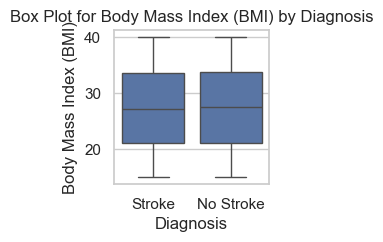

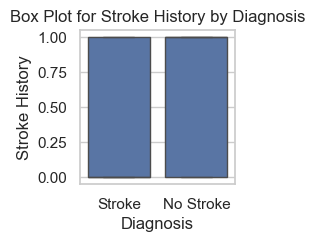

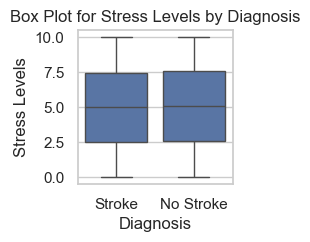

In [24]:
for col in numerical_col:
    plt.figure(figsize=(2,2))
    sns.boxplot(x=data['Diagnosis'],y=data[col])
    plt.title(f'Box Plot for {col} by Diagnosis')
plt.show()

<Axes: xlabel='Diagnosis', ylabel='count'>

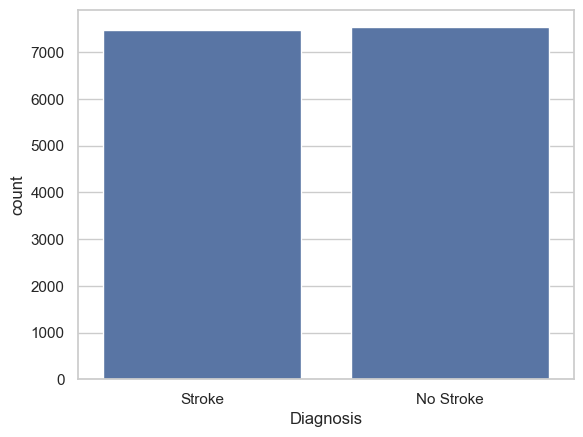

In [25]:
sns.countplot(data,x='Diagnosis')

# Visualizing Categorical Values

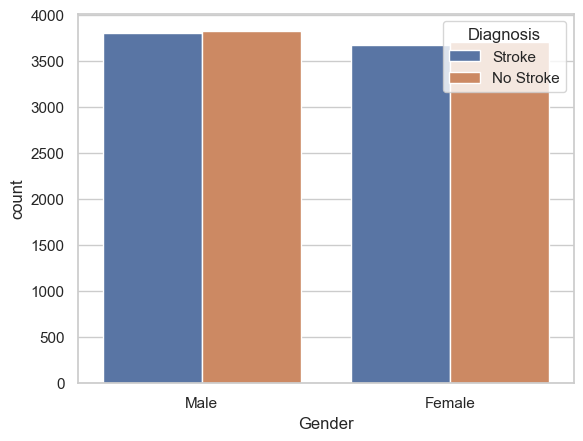

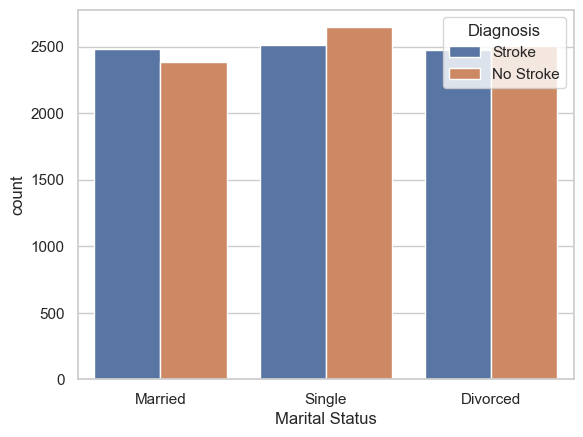

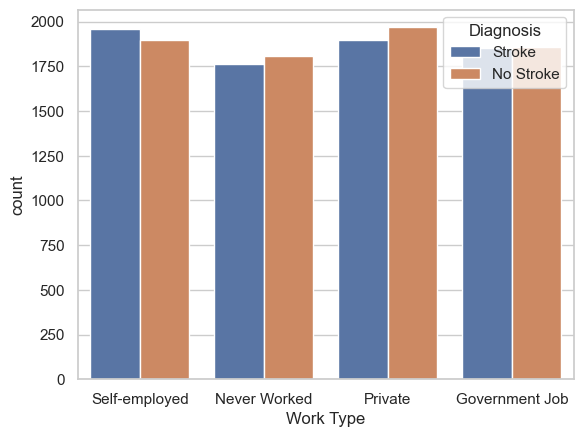

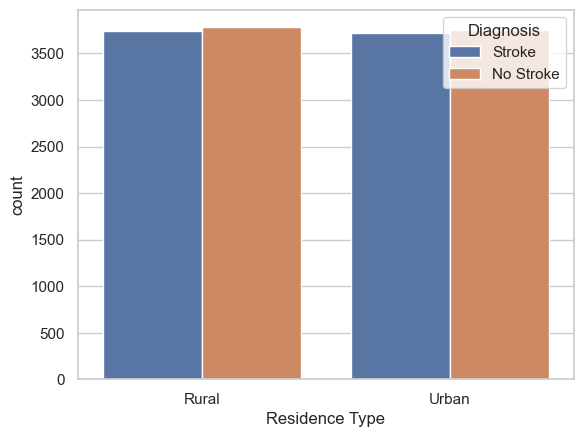

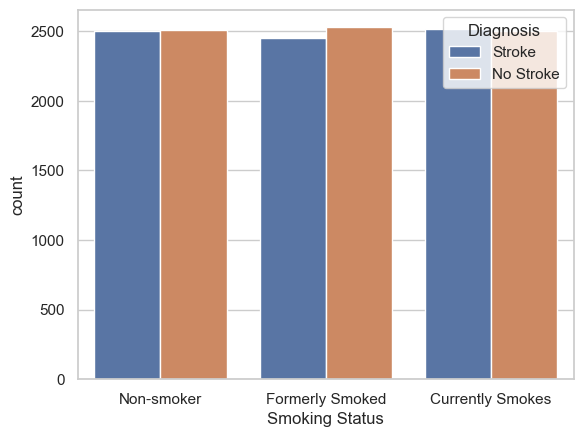

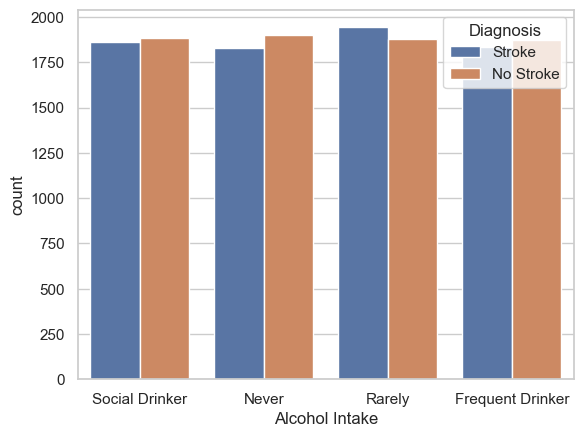

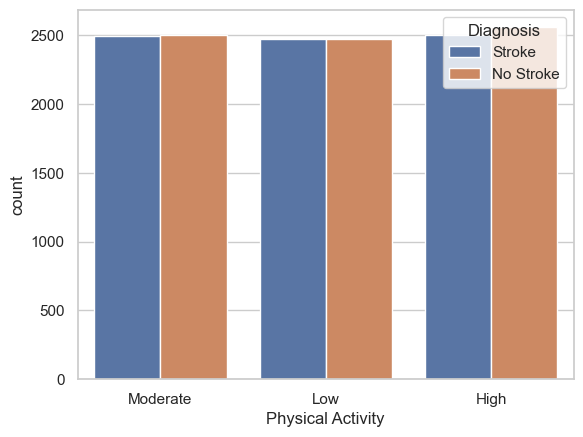

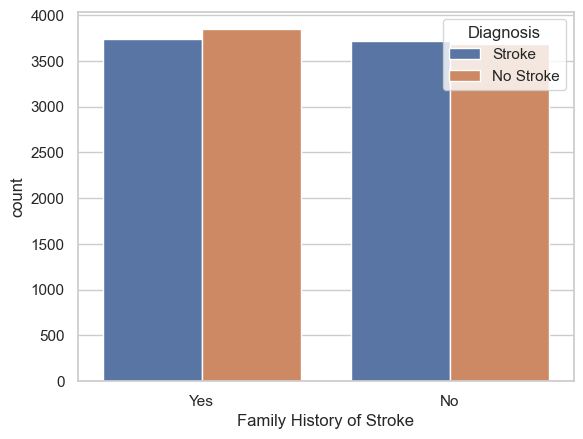

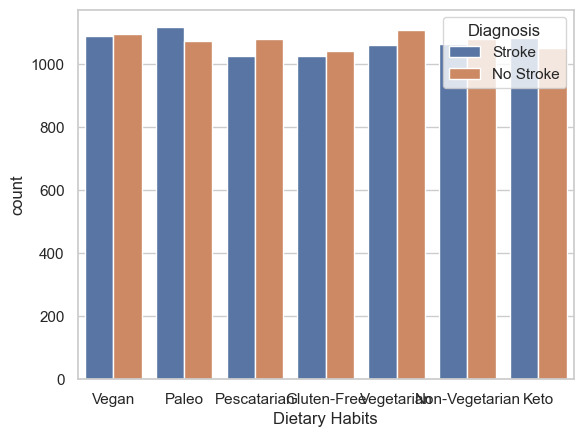

KeyboardInterrupt: 

Exception ignored in: <function TransformNode.set_children.<locals>.<lambda> at 0x000001A75B686160>
Traceback (most recent call last):
  File "C:\Users\mitta\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\transforms.py", line 198, in <lambda>
    self, lambda _, pop=child._parents.pop, k=id_self: pop(k))
                                                       ^^^^^^
KeyboardInterrupt: 


Error in callback <function _draw_all_if_interactive at 0x000001A742327B00> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001A7436AA7A0> (for post_execute), with arguments args (),kwargs {}:



KeyboardInterrupt



In [27]:
for col in category_col[:]:
    sns.countplot(data,x=col,hue='Diagnosis')
    plt.show()

# Label Encoding

In [28]:
from sklearn.preprocessing import LabelEncoder

In [30]:
category_cols = ['Gender','Marital Status','Work Type','Residence Type','Smoking Status','Alcohol Intake','Physical Activity','Family History of Stroke','Dietary Habits','Hypertension','Stroke History','Symptoms']
encoder = LabelEncoder()
for col in category_cols:
    data[col] = encoder.fit_transform(data[col])

data.head()

,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,Body Mass Index (BMI),Smoking Status,...,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Symptoms,Diagnosis,Systolic BP,Diastolic BP,HDL,LDL
0,56,1,0,1,1,3,0,130.91,22.37,2,...,0,1,5,3.48,1375,Stroke,140,108,68,133
1,80,1,0,0,2,3,1,183.73,32.57,2,...,0,0,3,1.73,3146,Stroke,146,91,63,70
2,26,1,1,1,1,1,0,189.00,20.32,1,...,0,1,3,7.31,4201,Stroke,154,97,59,95
3,73,1,0,0,1,1,1,185.29,27.50,2,...,0,0,3,5.35,4059,No Stroke,174,81,70,137
4,51,1,1,1,0,3,1,177.34,29.06,0,...,0,1,4,6.84,1150,Stroke,121,95,65,68
